# The Wolf Rayet Binary System: WR-140

## Learning Goals: 

This notebook will present the data for WR-140 as observed by TESS. Data presented here will complement those derived from the JWST early release science. 

The notebook will teach the user how to do the following:

1. Search TESS for data on the WR-140 system using *Lightkurve*.
2. Download a light curve data.
3. Stitch together the light curves from different sectors.
4. Obtain data from the full frame images (FFIs).
5. Derive light curves from the FFIs.
6. Correct the light curves for scattered light and instrumental noise.

To learn more about the TESS mission in general and the various data products please visit the [TESS Science Support Center](https://heasarc.gsfc.nasa.gov/docs/tess/).


## Introduction: 

WR-140 otherwise known as V1687-Cyg is a Wolf-Rayet (WR) star in a massive binary system in the constellation of Cygnus located ~6000 light years away. 

The system itself consists of the WR and a likely supergiant O5 type star. Wolf-Rayet stars are the decedents of massive O-stars, they are very luminous (>10<sup>5</sup> L<sub>sun</sub>), hot ( > 40,000 K), have strong winds (> 1000 km/s) and high mass loss rates (~10<sup>-5</sup> solar masses per year). 

In the WR-140 system both stars have radiatively driven winds which can reach ~3000 km/s. The amount of material lost from the stars through these winds can be between ~10<sup>-5</sup> (the Wolf-Rayet) to 10<sup>-6</sup> (the O5 supergiant) solar masses a year!<sup>[1]</sup>

Since both stars are losing mass via wind, these winds collide, producing shocks, this leads to interesting observations. As such WR-140 is often referred to as a "colliding wind binary" (CWB).

WR-140 is also interesting in that it was the first Wolf Rayet star system to show a sudden brightness at infrared wavelengths. This brightening is thought to be caused by an episodes of dust formation, where the dust condenses in the outflowing stellar wind and absorbs some of the stellar UV-optical radiation. The radiation absorbed causes the dust to heat to ~1000 K and as such a brightness increase in the infrared. Eventually the dust cools as it moves further away and is dispersed by the wind. 

These infrared brightening episodes are thought to be periodic and linked to the binary orbit, which is very eccentric and is approximately 2900 days (~8 years). Due to the connection of the dust formation with the binary orbit, the dust "flow" can actually be used to study the orbital parameters of the system, see the [YouTube](https://www.youtube.com/watch?v=AdtJA-seD8Q) video below for an illustration of the WR-140 and the dust formation.

Systems such as WR-140 are significant dust produces in the galaxy and as such of significant scientific interest since we don't fully understand the dust formation process or how much of it can survive in such hostile environments. 

WR-140 is often referred to as the "prototype periodic episodic dust-maker", as such it is one of the objects selected for observation by JWST as part of the early release science program. It will be observed by the MIRI Imager and Spectrometer (IFU), in addition ot NIRISS. 

Imaging will be used to reveal the past 8 dust formation episodes, and the IFU will be used find molecules/signatures of WR dust. NIRISS will be used to obtain high contrast spatial resolution information to resolve the morphology of the dust. 

The last episode of dust formation was observed in late 2016, with the next expected in late 2024. As such TESS has only observed the system during periods where there is no significant brightening event.


<sub>1. See this [webpage](https://www.roe.ac.uk/~pmw/Wr140int.htm) for more information on the WR-140 system.</sub>

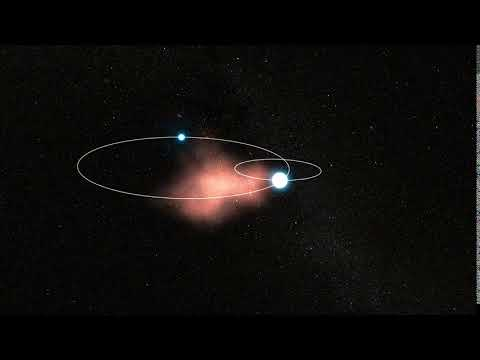

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('AdtJA-seD8Q')

## Imports

This tutorial requires the [*Lightkurve package*](https://docs.lightkurve.org/index.html), [Matplotlib](https://matplotlib.org/) which we use for plotting, [Numpy](https://numpy.org/), and also [Astropy](https://www.astropy.org/) which we use for the units package.

In [2]:
%matplotlib inline 
import lightkurve as lk 
import matplotlib.pyplot as plt
import numpy as np

## First time users: 

If you are not that experienced with Python, or cannot download *Lightkurve*, you can run this notebook as a [Google Colab notebook](https://colab.research.google.com/?utm_source=scs-index). Colaboratory allows users to write and execute Python in your browser with zero configuration required.

All you need is a Google account and to copy and paste in the following command at the top of your colab notebook:

`!pip install lightkurve --quiet`

This downloads the Lightkurve package.

## 1. Search TESS for data on the WR-140 system using *Lightkurve*.

Lightkurve offers a user-friendly way to analyze time series data obtained by the TESS mission. You can search for the various WR-140 data products using the following functions:

- To the system in a full frame image: [`search_tesscut()`](https://docs.lightkurve.org/reference/api/lightkurve.search_tesscut.html?highlight=search_tesscut)
- To look for target pixel files: [`search_targetpixelfile()`](https://docs.lightkurve.org/reference/api/lightkurve.search_targetpixelfile.html?highlight=search_targetpixelfile)
- To obtain light curve files for WR 140: [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve)




### 1.1 Accessing the data products
Let’s go through each one of the above functions and see what data is available.

In [3]:
search_ffi = lk.search_tesscut('WR140')
search_tpf = lk.search_targetpixelfile('WR140')
search_lcf = lk.search_lightcurve('WR140')

In [4]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,TESScut,1426,WR140,0.0
1,TESS Sector 15,2019,TESScut,1426,WR140,0.0
2,TESS Sector 41,2021,TESScut,475,WR140,0.0


The above table provides several important pieces of information: 

- The sector in which the object was observed. 
- The year in which the object was observed. 
- The author of the data. This can have multiple options, and each is a hyperlink that when clicked will provide you with more information. 
- The cadence of the observation. 
- The name of the target. 
- The distance of the observation from your target of interest. This is useful if you conduct a cone search around your objects co-ordinates.

The table indicates that our object was observed in sectors 14, 15, 41.

Let’s see if any other data exists, i.e., was it observed as a target of interest and does it have a Target Pixel File.

In [5]:
search_tpf

SearchResult containing 0 data products.

Unfortunately our object was not observed as a target of interest and as such a target pixel file was not produced by the SPOC. This means that no light curve data will have been produced by the SPOC, but that other light curves may have been created as TESS [Higher Level Science Products (HLSP)](https://archive.stsci.edu/hlsp/). 

High Level Science Products are observations, catalogs, or models that complement, or are derived from, MAST-supported missions, including TESS. HLSPs can include images, spectra, light curves, maps, source catalogs, or simulations. 

They can include observations from other telescopes, or data that have been processed in a way that differs from what's available in the originating archive.  

All HLSPs are public immediately with no proprietary periods.  

Let us now search for any light curves for our object of interest.

In [6]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,QLP,1800,193109650,0.0
1,TESS Sector 15,2019,QLP,1800,193109650,0.0


Above we can see that HLSP light curves were produced for our object of interest via the [Quick Look Pipeline (QLP)](https://archive.stsci.edu/hlsp/qlp). If you click on the "author" hyperlink you can learn more about these data products. 

For these data the QLP team at MIT produced light curves for a magnitude limited (TESS magnitude < 13.5) sample of stars and of other "stationary luminous objects" from TESS FFIs. 

The pipeline used to process the data and create the QLP light curves is different to the SPOC pipeline, to learn more about the QLP procedure please see [Huang et. al, (2020)](https://arxiv.org/pdf/2011.06459.pdf). 

## 2. Download a light curve data.

We can download the QLP light curves as a collection and plot them via the following code. Note that the optimal light curve produced by the QLP is flattened as shown below.

In [7]:
lc_collection = search_lcf.download_all()

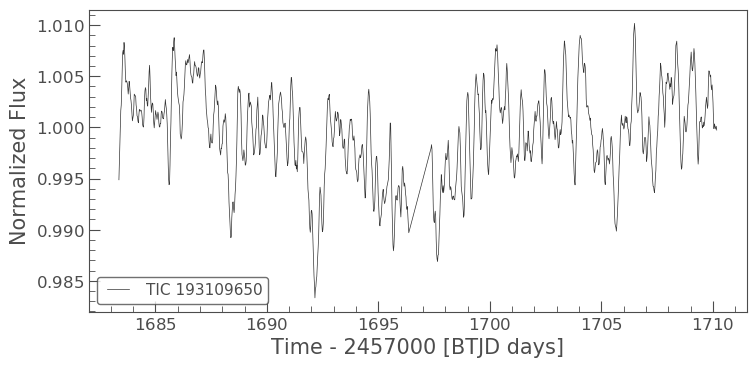

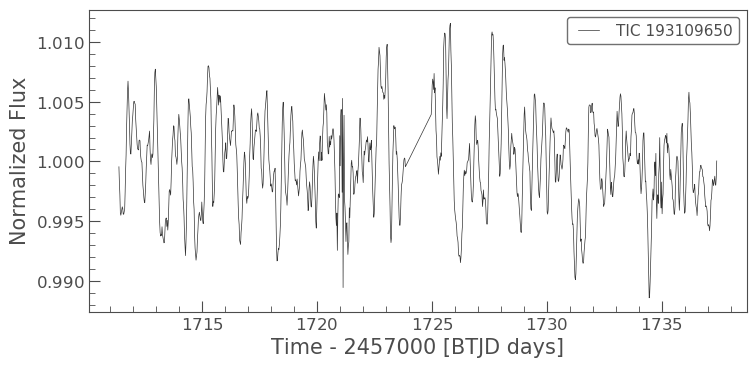

In [8]:
lc_collection[0].plot()
lc_collection[1].plot()

## 3. Stitch together the light curves from different sectors.

We can now use the [`stitch`](https://docs.lightkurve.org/reference/api/lightkurve.LightCurveCollection.stitch.html?highlight=stitch) in *Lightkurve* to combine these data sets and examine any variability. 

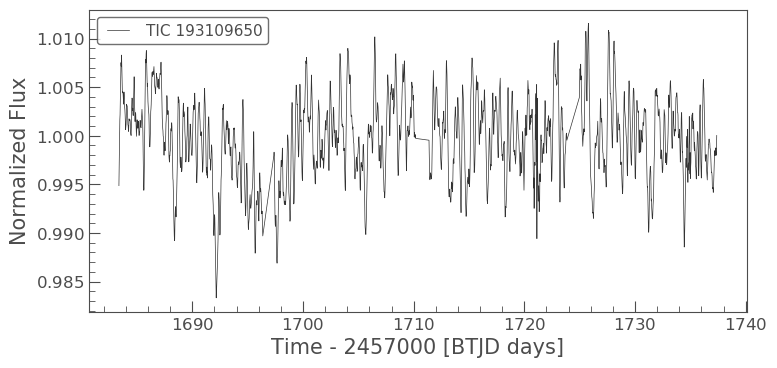

In [9]:
lc_stitched = lc_collection.stitch()
lc_stitched.plot()

We now have the QLP light curve for our object which covers two TESS sectors. As you can see from the light curve there is no major variation, which what we expect. This means that there is no increase in brightness due to dust formation and radiation. 

## 4. Obtain data from the full frame images (FFIs).

We have used the QLP light curves to examine our object, but what about the information from sector 41? Also, how would we derive our light curves if the QLP data did not exist? Below we show you how to do this. 

First, we must download data for our target from each of the FFIs and specify the number of pixels around our object of interest. We can do this using the `cutout_size` function, here we are requesting an 11x11 pixel sized box. 

To learn more about [How to cut out Target Pixel Files from Kepler Superstamps or TESS FFIs](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-1-cutting-out-tpfs.html) see the linked tutorial.

In [10]:
ffi_s14 = search_ffi[0].download(cutout_size=11)
ffi_s15 = search_ffi[1].download(cutout_size=11)
ffi_s41 = search_ffi[2].download(cutout_size=11)

OK we have now cut out 11x11 pixel stamps of our object from each sector. Let us plot one of them and see what it looks like. 

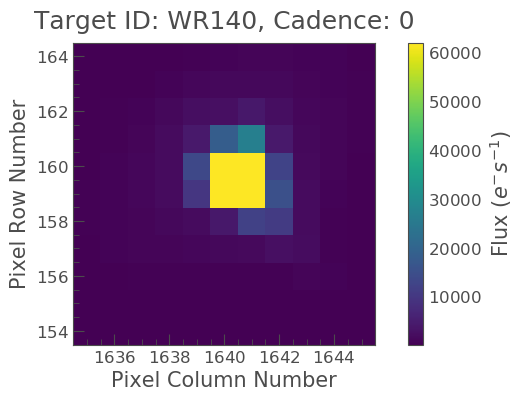

In [11]:
ffi_s14.plot()

The values shown in this image are also directly accessible as an array, e.g., `ffi_s14.flux[0]` will present the flux in cadence zero.

To create our light curve we will need to assign an aperture. We can do this via several methods as discussed in the [`Creating your own light curves using custom aperture photometry`](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-1-custom-aperture-photometry.html) tutorial. In this instance we will use the [`create_threshold_mask`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.create_threshold_mask.html?highlight=create_threshold_mask) function. This is *Lightkurve’s* default 3 standard deviations threshold mask. For this tutorial we will use a threshold value of 10 since this picks out only the brightest pixels for our object. We can create this mask and view it via the following code:

In [12]:
tm_s14 = ffi_s14.create_threshold_mask(threshold=10, reference_pixel='center')
tm_s15 = ffi_s15.create_threshold_mask(threshold=10, reference_pixel='center')
tm_s41 = ffi_s41.create_threshold_mask(threshold=10, reference_pixel='center')

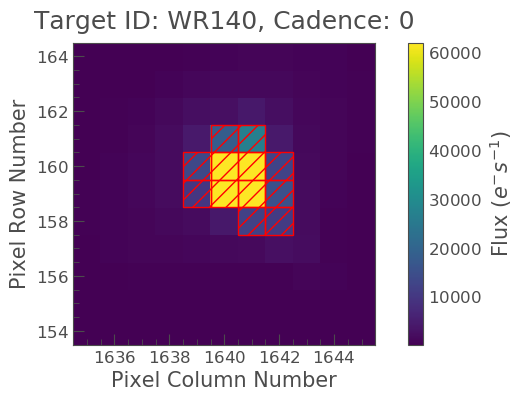

In [13]:
ffi_s14.plot(aperture_mask=tm_s14)

## 5. Derive light curves from the FFIs.

Using these apertures, we now want to derive our light curves from our cut outs. Note that these light curves will still contain scattered light and various other noise effects that will require removal. We can convert our cut out time series into light curves via the [`to_lightcurve`](https://docs.lightkurve.org/reference/api/lightkurve.KeplerTargetPixelFile.to_lightcurve.html?highlight=to_lightcurve) function as shown.

In [14]:
tpflc_s14 = ffi_s14.to_lightcurve(aperture_mask=tm_s14)
tpflc_s15 = ffi_s15.to_lightcurve(aperture_mask=tm_s15)
tpflc_s41 = ffi_s41.to_lightcurve(aperture_mask=tm_s41)

Let us now plot each sector light curve.

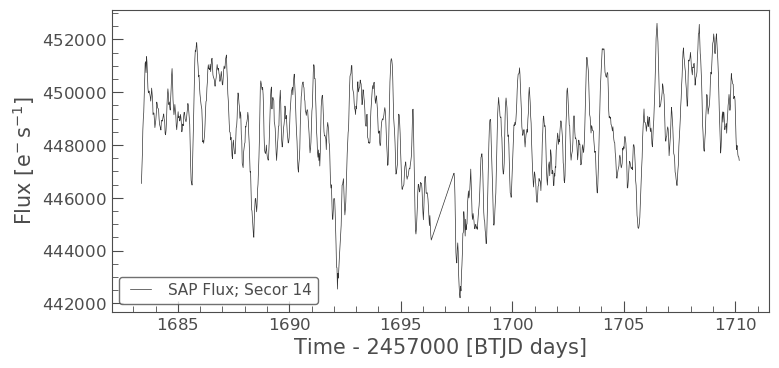

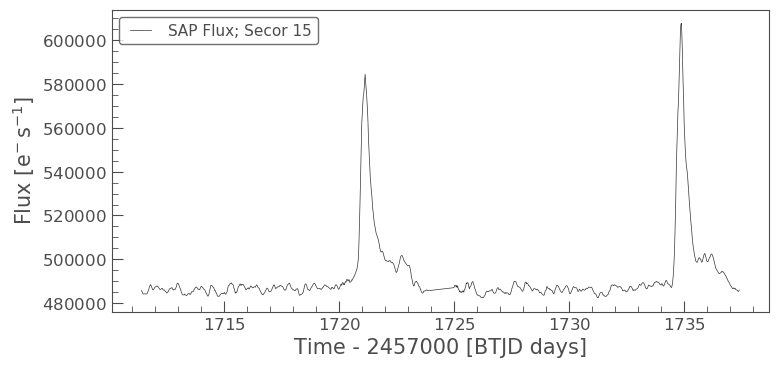

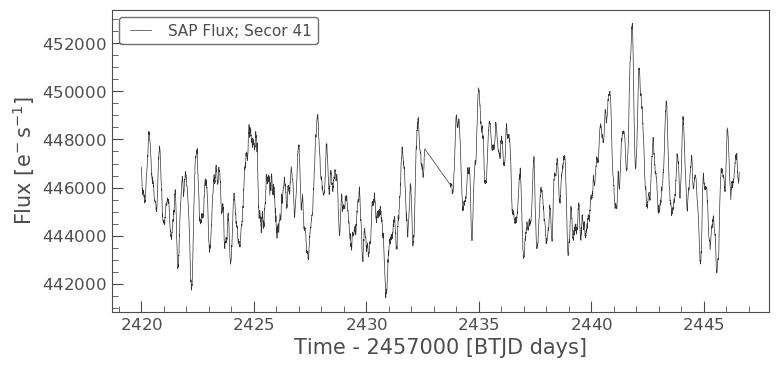

In [15]:
tpflc_s14.plot(label="SAP Flux; Secor 14")
tpflc_s15.plot(label="SAP Flux; Secor 15")
tpflc_s41.plot(label="SAP Flux; Secor 41")

Although sectors 14 and 41 seem to look ok, the data from sector 15 has clearly been affected by scattered light as indicated via the two large peaks. We will need to remove these via further processing.

## 6. Correct the light curves for scattered light and instrumental noise.

*Lightkurve* provides several [Corrector functions](https://docs.lightkurve.org/tutorials/index.html#removing-instrumental-noise) to remove instrumental noise from TESS data. These include a [CBVCorrector](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-how-to-use-cbvcorrector.html), a [RegressionCorrector](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-removing-scattered-light-using-regressioncorrector.html), and a [PLDCorrector](https://docs.lightkurve.org/tutorials/2-creating-light-curves/2-3-k2-pldcorrector.html).

For this tutorial we will use the RegressionCorrector. This method relies on looking at pixels outside of our previously defined object aperture to determine our systematics. We can apply regression correction as follows.

In [16]:
#Import the packages you need
from lightkurve.correctors import RegressionCorrector, DesignMatrix

Next, we are going to define a design matrix which will contain all the systematics detected in the pixels outside of our aperture.

In [17]:
dm = DesignMatrix(ffi_s15.flux[:, ~tm_s15], name='regressors')

 We only want the most dominant vectors and so specify the number of principle componant (PCA) as follows,

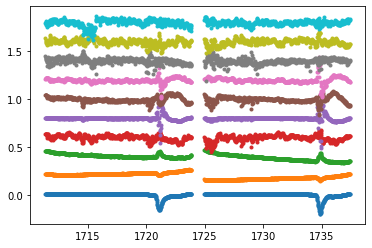

In [18]:
dm = dm.pca(10)
plt.plot(ffi_s15.time.value, dm.values + np.arange(10)*0.2, '.');

From this we can see that 10 is excessive and we should probably use only 3. Let's do this and plot it up.

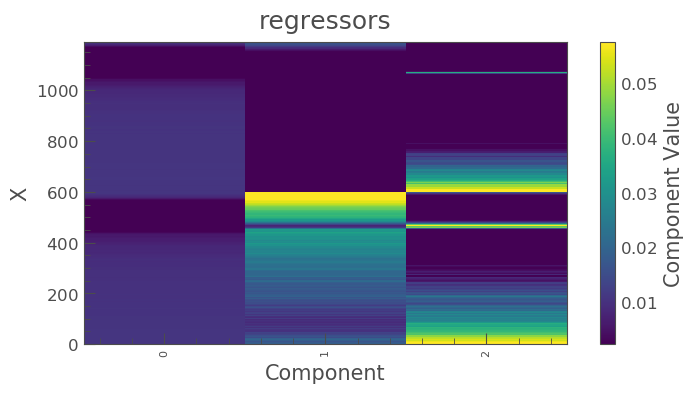

In [19]:
dm = DesignMatrix(ffi_s15.flux[:, ~tm_s15], name='regressors').pca(3)
dm.plot()

*Lightkurve’s RegressionCorrector* uses linear algebra to find the combination of vectors that makes the input light curve closest to zero. We therefore needed to add one more component - an “offset” term, to be able to fit the mean level of the light curve. We can do this as shown above by appending a“constant” to the design matrix.

In [20]:
dm = DesignMatrix(ffi_s15.flux[:, ~tm_s15], name='regressors').pca(3).append_constant()

Next we pass this design matrix to the RegressionCorrector which de-trends the light curves against the vectors.

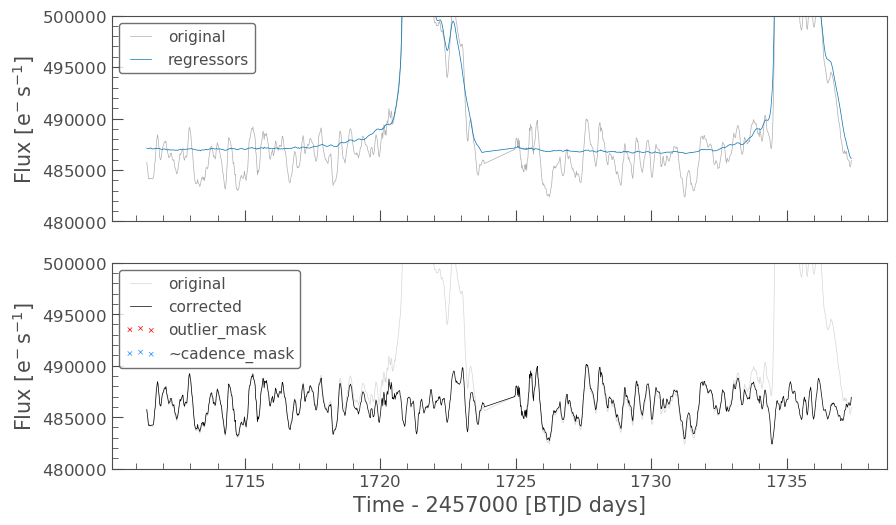

In [21]:
rc = RegressionCorrector(tpflc_s15)
rc.correct(dm)
pltAxis = rc.diagnose()
pltAxis[0].set_ylim(480000, 500000);
pltAxis[1].set_ylim(480000, 500000);

corrected_lcdm_s15 = rc.correct(dm)

**HOWEVER!** The *RegressionCorrector* assumes that you want to remove the trend and set the light curve to the mean level. 

This isn’t true for *TESS* scattered light, as the *TESS* FFI light curves have an additive background. As such, we want to reduce the flux to the lowest recorded level.

To do this, we can look at the model of the background that *RegressionCorrector* built and apply that.  This model should never go below zero, to ensure that this is the case we only subtract the model flux value at the 5th percentile.

We can then apply all these factors to the FFI light curve using the following code,

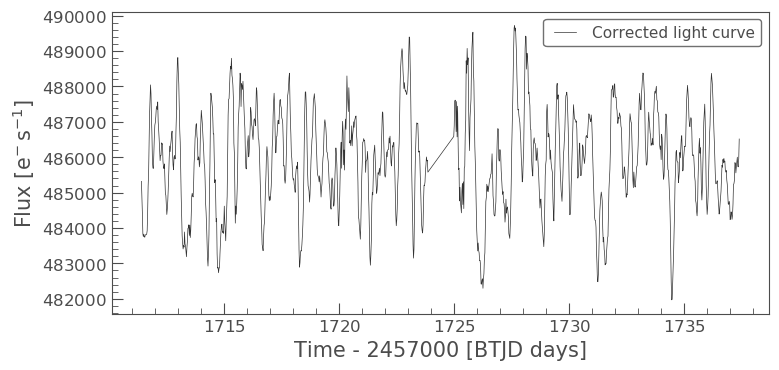

In [22]:
# Optional: Remove the scattered light, allowing for the large offset from scattered light
corrected_lcdm_s15 = tpflc_s15 - rc.model_lc + np.percentile(rc.model_lc.flux, 5)
corrected_lcdm_s15.plot(label='Corrected light curve');

Great we have now removed the scattered light from the sector 15 data. Although 14 and 41 were not as severly affected by scattered light we should still probably run them through the same process. We can do this as follows:

In [23]:
dm = lk.DesignMatrix(ffi_s14.flux[:, ~tm_s14], name='regressors').pca(3).append_constant()
rc = lk.RegressionCorrector(tpflc_s14)
corrected_lcdm_s14 = rc.correct(dm)

corrected_lcdm_s14 = tpflc_s14 - rc.model_lc + np.percentile(rc.model_lc.flux, 3)

dm3 = lk.DesignMatrix(ffi_s41.flux[:, ~tm_s41], name='regressors').pca(3).append_constant()
rc3 = lk.RegressionCorrector(tpflc_s41)
corrected_lcdm_s41 = rc3.correct(dm3)

corrected_lcdm_s41 = tpflc_s41 - rc3.model_lc + np.percentile(rc3.model_lc.flux, 3)

Let us now plot up all corrected data.

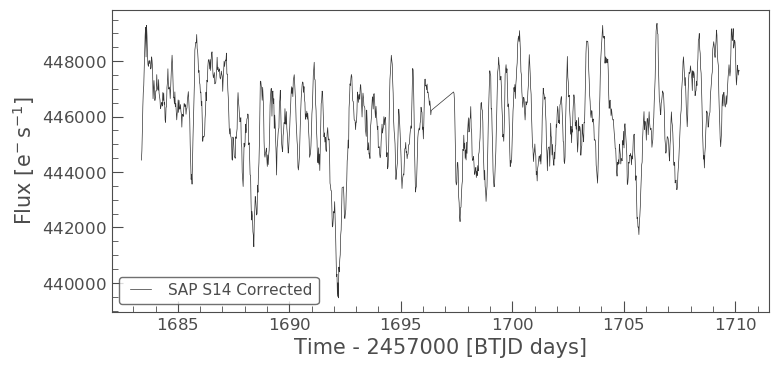

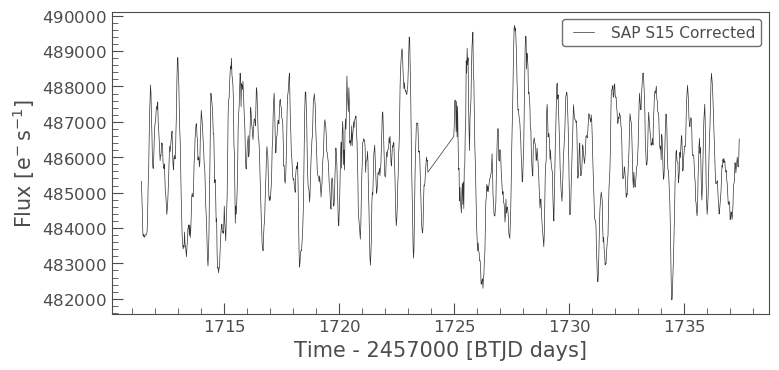

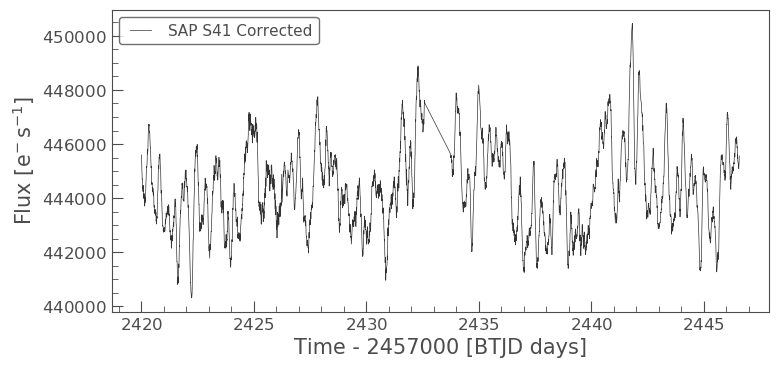

In [24]:
corrected_lcdm_s14.remove_outliers().remove_nans().plot(label='SAP S14 Corrected')
corrected_lcdm_s15.remove_outliers().remove_nans().plot(label="SAP S15 Corrected")
corrected_lcdm_s41.remove_outliers().remove_nans().plot(label="SAP S41 Corrected")

Once again we can also stitch these data together, but via a slightly different method.

(1680, 1740)

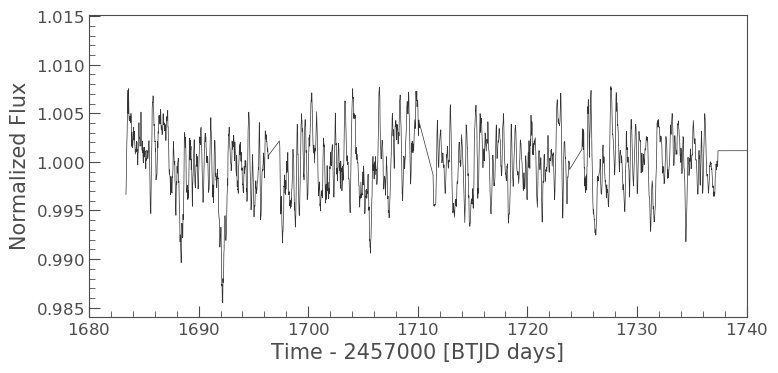

In [25]:
LCs = corrected_lcdm_s14.normalize().remove_outliers().append(corrected_lcdm_s15.normalize().remove_outliers())
LCcollection_FFI = LCs.append(corrected_lcdm_s41.normalize().remove_outliers())

LCcollection_FFI.plot()
plt.xlim(1680,1740)

Once again we have a stitched light curve from sectors 14 and 15.